# Preprocessing

In [82]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import contractions

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import balanced_accuracy_score

[nltk_data] Downloading package stopwords to C:\Users\Trifebi
[nltk_data]     Shina.S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Trifebi
[nltk_data]     Shina.S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Trifebi
[nltk_data]     Shina.S\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Trifebi Shina.S\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:
df_train = pd.read_csv("datasets/sms_train.csv")
df_train.head()

,label,message
0,0,I dont. Can you send it to me. Plus how's mode.
1,0,Or i go home first lar ü wait 4 me lor.. I put down my stuff first..
2,0,"Me, i dont know again oh"
3,0,"I'll see, but prolly yeah"
4,0,"Night has ended for another day, morning has come in a special way. May you smile like the sunny rays and leaves your worries at the blue blue bay. Gud mrng"


In [7]:
vectorizer = CountVectorizer()
vectorizer.fit(df_train['message'])
vocabulary = vectorizer.vocabulary_
features = list(vocabulary.keys())
num_features = len(features)
print("Number of features (unique words):", num_features)

Number of features (unique words): 7913


In [8]:
df_test = pd.read_csv("datasets/sms_test.csv")
df_test.head()

,message
0,"Yo, you at jp and hungry like a mofo?"
1,It's é only $140 ard...É rest all ard $180 at least...Which is é price 4 é 2 bedrm ($900)
2,"&lt;#&gt; , that's all? Guess that's easy enough"
3,Y?WHERE U AT DOGBREATH? ITS JUST SOUNDING LIKE JAN C THATS AL!!!!!!!!!
4,"Good afternoon sexy buns! How goes the job search ? I wake and you are my first thought as always, my love. I wish your fine and happy and know I adore you!"


## Case Folding

In [9]:
df_train['message'] = df_train['message'].str.lower()
df_train.head()

,label,message
0,0,i dont. can you send it to me. plus how's mode.
1,0,or i go home first lar ü wait 4 me lor.. i put down my stuff first..
2,0,"me, i dont know again oh"
3,0,"i'll see, but prolly yeah"
4,0,"night has ended for another day, morning has come in a special way. may you smile like the sunny rays and leaves your worries at the blue blue bay. gud mrng"


In [11]:
df_test['message'] = df_test['message'].str.lower()
df_test.head()

,message
0,"yo, you at jp and hungry like a mofo?"
1,it's é only $140 ard...é rest all ard $180 at least...which is é price 4 é 2 bedrm ($900)
2,"&lt;#&gt; , that's all? guess that's easy enough"
3,y?where u at dogbreath? its just sounding like jan c thats al!!!!!!!!!
4,"good afternoon sexy buns! how goes the job search ? i wake and you are my first thought as always, my love. i wish your fine and happy and know i adore you!"


## Cleansing/Punctuation Removal

In [12]:
def cleansing(messages):
  clean_message = re.sub('(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^A-Za-z \t])|(\w+:\/\/\S+)','', messages)
  return clean_message

In [13]:
df_train['message'] = df_train['message'].apply(cleansing)
df_train.head()

,label,message
0,0,i dont can you send it to me plus hows mode
1,0,or i go home first lar wait me lor i put down my stuff first
2,0,me i dont know again oh
3,0,ill see but prolly yeah
4,0,night has ended for another day morning has come in a special way may you smile like the sunny rays and leaves your worries at the blue blue bay gud mrng


In [14]:
df_test['message'] = df_test['message'].apply(cleansing)
df_test.head()

,message
0,yo you at jp and hungry like a mofo
1,its only ard rest all ard at leastwhich is price bedrm
2,ltgt thats all guess thats easy enough
3,ywhere u at dogbreath its just sounding like jan c thats al
4,good afternoon sexy buns how goes the job search i wake and you are my first thought as always my love i wish your fine and happy and know i adore you


## Normalization

In [15]:
def normalize(messages):
  return contractions.fix(messages)

In [16]:
df_train['message'] = df_train['message'].apply(normalize)
df_train.head()

,label,message
0,0,i do not can you send it to me plus how is mode
1,0,or i go home first lar wait me lor i put down my stuff first
2,0,me i do not know again oh
3,0,ill see but probably yeah
4,0,night has ended for another day morning has come in a special way may you smile like the sunny rays and leaves your worries at the blue blue bay gud mrng


In [17]:
df_test['message'] = df_test['message'].apply(normalize)
df_test.head()

,message
0,yo you at jp and hungry like a mofo
1,its only ard rest all ard at leastwhich is price bedrm
2,ltgt that is all guess that is easy enough
3,ywhere you at dogbreath its just sounding like jan c that is al
4,good afternoon sexy buns how goes the job search i wake and you are my first thought as always my love i wish your fine and happy and know i adore you


## Tokenization

In [18]:
def tokenize(messages):
    return word_tokenize(messages)

In [19]:
df_train['message'] = df_train['message'].apply(tokenize)
df_train.head()

,label,message
0,0,"[i, do, not, can, you, send, it, to, me, plus, how, is, mode]"
1,0,"[or, i, go, home, first, lar, wait, me, lor, i, put, down, my, stuff, first]"
2,0,"[me, i, do, not, know, again, oh]"
3,0,"[ill, see, but, probably, yeah]"
4,0,"[night, has, ended, for, another, day, morning, has, come, in, a, special, way, may, you, smile, like, the, sunny, rays, and, leaves, your, worries, at, the, blue, blue, bay, gud, mrng]"


In [20]:
df_test['message'] = df_test['message'].apply(tokenize)
df_test.head()

,message
0,"[yo, you, at, jp, and, hungry, like, a, mofo]"
1,"[its, only, ard, rest, all, ard, at, leastwhich, is, price, bedrm]"
2,"[ltgt, that, is, all, guess, that, is, easy, enough]"
3,"[ywhere, you, at, dogbreath, its, just, sounding, like, jan, c, that, is, al]"
4,"[good, afternoon, sexy, buns, how, goes, the, job, search, i, wake, and, you, are, my, first, thought, as, always, my, love, i, wish, your, fine, and, happy, and, know, i, adore, you]"


## Stopword Removal

In [21]:
def stop_removal(messages):
  words = stopwords.words('english')
  words = set(words)
  return [word for word in messages if word not in words]

In [22]:
df_train['message']  = df_train['message'] .apply(stop_removal)
df_train.head()

,label,message
0,0,"[send, plus, mode]"
1,0,"[go, home, first, lar, wait, lor, put, stuff, first]"
2,0,"[know, oh]"
3,0,"[ill, see, probably, yeah]"
4,0,"[night, ended, another, day, morning, come, special, way, may, smile, like, sunny, rays, leaves, worries, blue, blue, bay, gud, mrng]"


In [23]:
df_test['message']  = df_test['message'] .apply(stop_removal)
df_test.head()

,message
0,"[yo, jp, hungry, like, mofo]"
1,"[ard, rest, ard, leastwhich, price, bedrm]"
2,"[ltgt, guess, easy, enough]"
3,"[ywhere, dogbreath, sounding, like, jan, c, al]"
4,"[good, afternoon, sexy, buns, goes, job, search, wake, first, thought, always, love, wish, fine, happy, know, adore]"


## Lemmatization

In [24]:
def lemmatize_pos(words, pos):
  lemmatizer = WordNetLemmatizer()
  
  pos_mapping = {
      'N': 'n',
        'V': 'v',
        'R': 'r',
        'J': 'a'
  }

  wordnet_pos = pos_mapping.get(pos[0], 'n')
  if wordnet_pos == 'n':
    return lemmatizer.lemmatize(words, pos='v')
  return lemmatizer.lemmatize(words, pos=wordnet_pos)

In [29]:
df_train['message']  = df_train['message'] .apply(lambda x: [lemmatize_pos(words, pos) for words, pos in pos_tag(x)])
df_train.head()

,label,message
0,0,"[send, plus, mode]"
1,0,"[go, home, first, lar, wait, lor, put, stuff, first]"
2,0,"[know, oh]"
3,0,"[ill, see, probably, yeah]"
4,0,"[night, end, another, day, morning, come, special, way, may, smile, like, sunny, ray, leave, worry, blue, blue, bay, gud, mrng]"


In [30]:
all_tokens = [token for sentence in df_train['message'] for token in sentence]
num_features = len(set(all_tokens))
print("Number of features (unique words):", num_features)

Number of features (unique words): 6784


In [31]:
df_test['message']  = df_test['message'] .apply(lambda x: [lemmatize_pos(words, pos) for words, pos in pos_tag(x)])
df_test.head()

,message
0,"[yo, jp, hungry, like, mofo]"
1,"[ard, rest, ard, leastwhich, price, bedrm]"
2,"[ltgt, guess, easy, enough]"
3,"[ywhere, dogbreath, sound, like, jan, c, al]"
4,"[good, afternoon, sexy, buns, go, job, search, wake, first, think, always, love, wish, fine, happy, know, adore]"


# TF-IDF

In [33]:
def join_text_list(texts):
    return ' '.join([text for text in texts])

In [34]:
df_train["final message"] = df_train["message"].apply(join_text_list)
df_train.head()

,label,message,final message
0,0,"[send, plus, mode]",send plus mode
1,0,"[go, home, first, lar, wait, lor, put, stuff, first]",go home first lar wait lor put stuff first
2,0,"[know, oh]",know oh
3,0,"[ill, see, probably, yeah]",ill see probably yeah
4,0,"[night, end, another, day, morning, come, special, way, may, smile, like, sunny, ray, leave, worry, blue, blue, bay, gud, mrng]",night end another day morning come special way may smile like sunny ray leave worry blue blue bay gud mrng


In [35]:
df_test["final message"] = df_test["message"].apply(join_text_list)
df_test.head()

,message,final message
0,"[yo, jp, hungry, like, mofo]",yo jp hungry like mofo
1,"[ard, rest, ard, leastwhich, price, bedrm]",ard rest ard leastwhich price bedrm
2,"[ltgt, guess, easy, enough]",ltgt guess easy enough
3,"[ywhere, dogbreath, sound, like, jan, c, al]",ywhere dogbreath sound like jan c al
4,"[good, afternoon, sexy, buns, go, job, search, wake, first, think, always, love, wish, fine, happy, know, adore]",good afternoon sexy buns go job search wake first think always love wish fine happy know adore


In [38]:
tf_idf_train = TfidfVectorizer(binary=True)
tfidf_mat_train = tf_idf_train.fit_transform(df_train["final message"]).toarray()
tfidf_train = pd.DataFrame(tfidf_mat_train, columns=tf_idf_train.get_feature_names_out())

df = np.sum(tfidf_train > 0, axis=0)
threshold = 0.002 * tfidf_train.shape[0]
tfidf_train = tfidf_train.loc[:, df > threshold]
indexes = [el for el in tfidf_train.columns.values if el in tfidf_test.columns.values]
tfidf_train = tfidf_train.loc[:, indexes]

tfidf_train.head()

,abiola,able,account,actually,add,address,aft,afternoon,age,ah,...,yar,yeah,year,years,yes,yesterday,yet,yo,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.525276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
tf_idf_test = TfidfVectorizer(binary=True)
tfidf_mat_test = tf_idf_test.fit_transform(df_test["final message"]).toarray()
tfidf_test = pd.DataFrame(tfidf_mat_test, columns=tf_idf_test.get_feature_names_out())

tfidf_test = tfidf_test.loc[:, tfidf_train.columns.values]

tfidf_test.head()

,abiola,able,account,actually,add,address,aft,afternoon,age,ah,...,yar,yeah,year,years,yes,yesterday,yet,yo,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400931,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276309,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [40]:
X = tfidf_train
X[0:5]

,abiola,able,account,actually,add,address,aft,afternoon,age,ah,...,yar,yeah,year,years,yes,yesterday,yet,yo,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.525276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
y = df_train['label']
y

0       0
1       0
2       0
3       0
4       0
       ..
4567    0
4568    1
4569    0
4570    0
4571    0
Name: label, Length: 4572, dtype: int64

# Train Validation Split

In [42]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, 
    y,
    test_size=0.2,
    shuffle=True,
)

In [43]:
print("Train set: ", X_train.shape, y_train.shape)
print("Validation set: ", X_valid.shape, y_valid.shape)

Train set:  (3657, 624) (3657,)
Validation set:  (915, 624) (915,)


# Feature selection

## Method 1

In [44]:
# all methods
def high_correlation(X_train, t):
    print("high_correlation")
    
    corr_matrix = X_train.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > t)]
    X_train.drop(to_drop, axis=1, inplace=True)
    return X_train

def information_gain(X_train, y_train, t):
    print("information_gain")

    importance = mutual_info_classif(X_train, y_train)
    return X_train.loc[:, importance > np.quantile(importance, t)]


def fisher_score(X_train, y_train, t):
    print("fisher_score")
    chi2_selector = SelectKBest(chi2, k=t)
    chi2_selector.fit(X_train, y_train)

    return X_train.loc[:, chi2_selector.get_support()]

In [45]:
# method 1
def forward_feature_selection(X_train, y_train, t):
    print("forward_features_selection")
    
    model = XGBClassifier()
    sfs = SequentialFeatureSelector(model, n_features_to_select=t)
    sfs.fit(X_train, y_train)
    return X_train.loc[:, sfs.get_support()]

# method 2
def recursive_feature_eliminator(X_train, y_train, t):
    print("recursive_feature_eliminator")

    model = XGBClassifier()
    rfe = RFE(estimator=model, n_features_to_select=t, step=1)
    rfe.fit(X_train, y_train)
    return X_train.loc[:, rfe.get_support()]

# method 3
def select_from_model(X_train, y_train, t):
    print("select_from_model")

    sfm = SelectFromModel(XGBClassifier(n_estimators=100), max_features=t)
    sfm.fit(X_train, y_train)
    return X_train.loc[:, sfm.get_support()]

# method 4
def logistic_regression_l1(X_train, y_train, t):
    print("logistic_regression_l1")

    sfm = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter=1000))
    sfm.fit(X_train, y_train)
    return X_train.iloc[:, sfm.get_support()]

In [46]:
def feature_selection_method1(settings, X_train, y_train, X_valid, y_valid):
    # Feature selection
    print(f"Features initial: {X_train.shape[1]}\n")

    X_train_t = high_correlation(X_train, settings["high_correlation"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    ## Methods to take important features
    X_train_t = information_gain(X_train_t, y_train, settings["information_gain"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_train_t = fisher_score(X_train_t, y_train, settings["fisher_score"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_train_t = forward_feature_selection(X_train_t, y_train, settings["forward_feature_selection"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_valid_t = X_valid.loc[:, X_train_t.columns]

    # Evaluation
    model = XGBClassifier()
    model.fit(X_train_t, y_train)

    y_train_pred = model.predict(X_train_t)
    y_valid_pred = model.predict(X_valid_t)

    print(f"Words left: {X_train_t.columns.values}")
    print(f"Accuracy train: {np.round(balanced_accuracy_score(y_train, y_train_pred), 4)}")
    print(f"Accuracy valid: {np.round(balanced_accuracy_score(y_valid, y_valid_pred), 4)}")
    
    return X_train_t, X_valid_t


# smoke test
settings = {
    "variance_threshold": 0,
    "mean_absolute_deviance": 0.005,
    "high_correlation": 0.8,
    "information_gain": 0.7,
    "fisher_score": 5,
    "forward_feature_selection": 3,
}
X_train_t, X_test_t = feature_selection_method1(
    settings, 
    X_train, 
    y_train, 
    X_valid,
    y_valid,
)

Features initial: 624

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 5

forward_features_selection
Features left: 3

Words left: ['claim' 'free' 'txt']
Accuracy train: 0.7301
Accuracy valid: 0.7162


In [52]:
ffss = list(range(1, 21, 1))
iters = 3

j = 0
for ffs in ffss:
    for i in range(iters):
        settings = {
            "variance_threshold": 0.001,
            "mean_absolute_deviance": 0.005,
            "high_correlation": 0.8,
            "information_gain": 0.7,
            "fisher_score": 30,
            "forward_feature_selection": ffs,
        }

        X_train_t, X_valid_t = feature_selection_method1(
            settings, 
            X_train, 
            y_train, 
            X_valid,
            y_valid,
        )

        # accuracy on valid
        xgb = XGBClassifier()
        xgb.fit(X_train_t, y_train)

        ba_valid = np.round(balanced_accuracy_score(y_valid, xgb.predict(X_valid_t)), 2)

        pd.DataFrame(xgb.predict_proba(X_valid_t)).to_csv(f"output/spam/method1/MACCHY_spam_prediction_{ffs}_{i}.txt")

        np.savetxt(f"output/spam/method1/MACCHY_spam_features_{ffs}_{i}.txt", X_train_t.columns.values, fmt="%s")

        j += 1

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

forward_features_selection
Features left: 1

Words left: ['call']
Accuracy train: 0.7043
Accuracy valid: 0.6943
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

forward_features_selection
Features left: 1

Words left: ['call']
Accuracy train: 0.7043
Accuracy valid: 0.6943
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

forward_features_selection
Features left: 1

Words left: ['call']
Accuracy train: 0.7043
Accuracy valid: 0.6943
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

forward_features_selection
Features left: 2

Words left: ['call' 'txt']
Accuracy train: 0.7954
Accuracy valid: 0.7945
Features initial: 623

high_co

Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

forward_features_selection
Features left: 11

Words left: ['call' 'claim' 'contact' 'free' 'guarantee' 'reply' 'service' 'stop'
 'tone' 'txt' 'win']
Accuracy train: 0.8988
Accuracy valid: 0.8992
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

forward_features_selection
Features left: 11

Words left: ['call' 'claim' 'contact' 'free' 'guarantee' 'reply' 'service' 'stop'
 'tone' 'txt' 'win']
Accuracy train: 0.8988
Accuracy valid: 0.8992
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

forward_features_selection
Features left: 11

Words left: ['call' 'claim' 'contact' 'free' 'guarantee' 'reply' 'service' 'stop'
 'tone' 'txt' 'win']
Accuracy train: 0.8988
Accuracy valid: 0.8992
Features initial: 623

high_correlation
Features left: 623

informat

Words left: ['award' 'call' 'cash' 'claim' 'contact' 'draw' 'free' 'guarantee'
 'landline' 'pmin' 'reply' 'service' 'stop' 'tone' 'txt' 'urgent' 'video'
 'win']
Accuracy train: 0.91
Accuracy valid: 0.8948
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

forward_features_selection
Features left: 19

Words left: ['award' 'call' 'cash' 'claim' 'contact' 'free' 'guarantee' 'line' 'pobox'
 'ppm' 'prize' 'reply' 'service' 'stop' 'tone' 'txt' 'urgent' 'video'
 'win']
Accuracy train: 0.906
Accuracy valid: 0.9004
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

forward_features_selection
Features left: 19

Words left: ['award' 'call' 'cash' 'claim' 'contact' 'free' 'guarantee' 'line' 'pobox'
 'prize' 'reply' 'service' 'stop' 'tone' 'txt' 'urgent' 'valid' 'video'
 'win']
Accuracy train: 0.907
Accuracy valid: 0.9042
Features initial: 623



## Method 2

In [53]:
def feature_selection_method2(settings, X_train, y_train, X_valid, y_valid):
    # Feature selection
    print(f"Features initial: {X_train.shape[1]}\n")

    X_train_t = high_correlation(X_train, settings["high_correlation"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    ## Methods to take important features
    X_train_t = information_gain(X_train_t, y_train, settings["information_gain"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_train_t = fisher_score(X_train_t, y_train, settings["fisher_score"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_train_t = recursive_feature_eliminator(X_train_t, y_train, settings["recursive_feature_eliminator"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_valid_t = X_valid.loc[:, X_train_t.columns]

    # Evaluation
    model = XGBClassifier()
    model.fit(X_train_t, y_train)

    y_train_pred = model.predict(X_train_t)
    y_valid_pred = model.predict(X_valid_t)

    print(f"Words left: {X_train_t.columns.values}")
    print(f"Accuracy train: {np.round(balanced_accuracy_score(y_train, y_train_pred), 4)}")
    print(f"Accuracy valid: {np.round(balanced_accuracy_score(y_valid, y_valid_pred), 4)}")
    
    return X_train_t, X_valid_t


# smoke test
settings = {
    "variance_threshold": 0.001,
    "mean_absolute_deviance": 0.005,
    "high_correlation": 0.8,
    "information_gain": 0.7,
    "fisher_score": 5,
    "recursive_feature_eliminator": 3,
}
X_train_t, X_test_t = feature_selection_method2(
    settings, 
    X_train, 
    y_train, 
    X_valid,
    y_valid,
)

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 5

recursive_feature_eliminator
Features left: 3

Words left: ['claim' 'prize' 'txt']
Accuracy train: 0.6822
Accuracy valid: 0.688


In [57]:
ffss = list(range(1, 21, 1))
iters = 3

j = 0
for ffs in ffss:
    for i in range(iters):
        settings = {
            "variance_threshold": 0,
            "mean_absolute_deviance": 0,
            "high_correlation": 0.8,
            "information_gain": 0.7,
            "fisher_score": 30,
            "recursive_feature_eliminator": ffs,
        }

        X_train_t, X_valid_t = feature_selection_method2(
            settings, 
            X_train, 
            y_train, 
            X_valid,
            y_valid,
        )

        # accuracy on valid
        xgb = XGBClassifier()
        xgb.fit(X_train_t, y_train)


        ba_valid = np.round(balanced_accuracy_score(y_valid, xgb.predict(X_valid_t)), 2)

        pd.DataFrame(xgb.predict_proba(X_valid_t)).to_csv(f"output/spam/method2/MACCHY_spam_prediction_{ffs}_{i}.txt")

        np.savetxt(f"output/spam/method2/MACCHY_spam_features_{ffs}_{i}.txt", X_train_t.columns.values, fmt="%s")

        j += 1

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

recursive_feature_eliminator
Features left: 1

Words left: ['claim']
Accuracy train: 0.5661
Accuracy valid: 0.5702
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

recursive_feature_eliminator
Features left: 1

Words left: ['claim']
Accuracy train: 0.5661
Accuracy valid: 0.5702
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

recursive_feature_eliminator
Features left: 1

Words left: ['claim']
Accuracy train: 0.5661
Accuracy valid: 0.5702
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

recursive_feature_eliminator
Features left: 2

Words left: ['claim' 'tone']
Accuracy train: 0.6042
Accuracy valid: 0.614
Features initial: 

Features left: 10

Words left: ['award' 'claim' 'nokia' 'pobox' 'prize' 'ringtone' 'service' 'tone' 'txt'
 'video']
Accuracy train: 0.7916
Accuracy valid: 0.7876
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

recursive_feature_eliminator
Features left: 11

Words left: ['award' 'call' 'claim' 'nokia' 'pmin' 'prize' 'ringtone' 'service' 'tone'
 'txt' 'urgent']
Accuracy train: 0.8552
Accuracy valid: 0.8584
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

recursive_feature_eliminator
Features left: 11

Words left: ['call' 'claim' 'nokia' 'pmin' 'prize' 'service' 'text' 'tone' 'txt'
 'urgent' 'vouchers']
Accuracy train: 0.882
Accuracy valid: 0.8591
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

recursive_feature_eliminator
Features left: 11

Words lef

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

recursive_feature_eliminator
Features left: 18

Words left: ['award' 'call' 'cash' 'claim' 'contact' 'mobile' 'nokia' 'pobox' 'prize'
 'reply' 'service' 'stop' 'text' 'tone' 'txt' 'urgent' 'video' 'vouchers']
Accuracy train: 0.9073
Accuracy valid: 0.876
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

recursive_feature_eliminator
Features left: 19

Words left: ['award' 'call' 'cash' 'claim' 'contact' 'draw' 'mobile' 'nokia' 'pobox'
 'prize' 'reply' 'ringtone' 'service' 'stop' 'text' 'tone' 'txt' 'urgent'
 'video']
Accuracy train: 0.9133
Accuracy valid: 0.8847
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

recursive_feature_eliminator
Features left: 19

Words left: ['award' 'call' 'cash' 'claim' 'cont

# Method 3

In [58]:
def feature_selection_method3(settings, X_train, y_train, X_valid, y_valid):
    # Feature selection
    print(f"Features initial: {X_train.shape[1]}\n")

    X_train_t = high_correlation(X_train, settings["high_correlation"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    ## Methods to take important features
    X_train_t = information_gain(X_train_t, y_train, settings["information_gain"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_train_t = fisher_score(X_train_t, y_train, settings["fisher_score"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_train_t = select_from_model(X_train_t, y_train, settings["select_from_model"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_valid_t = X_valid.loc[:, X_train_t.columns]

    # Evaluation
    model = XGBClassifier()
    model.fit(X_train_t, y_train)

    y_train_pred = model.predict(X_train_t)
    y_valid_pred = model.predict(X_valid_t)

    print(f"Words left: {X_train_t.columns.values}")
    print(f"Accuracy train: {np.round(balanced_accuracy_score(y_train, y_train_pred), 4)}")
    print(f"Accuracy valid: {np.round(balanced_accuracy_score(y_valid, y_valid_pred), 4)}")
    
    return X_train_t, X_valid_t


# smoke test
settings = {
    "variance_threshold": 0.001,
    "mean_absolute_deviance": 0.005,
    "high_correlation": 0.8,
    "information_gain": 0.7,
    "fisher_score": 5,
    "select_from_model": 3,
}
X_train_t, X_test_t = feature_selection_method3(
    settings, 
    X_train, 
    y_train, 
    X_valid,
    y_valid,
)

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 5

select_from_model
Features left: 2

Words left: ['claim' 'prize']
Accuracy train: 0.5932
Accuracy valid: 0.5921


In [63]:
ffss = list(range(1, 21, 1))
iters = 3

j = 0
for ffs in ffss:
    for i in range(iters):
        settings = {
            "variance_threshold": 0.001,
            "mean_absolute_deviance": 0.005,
            "high_correlation": 0.8,
            "information_gain": 0.7,
            "fisher_score": 30,
            "select_from_model": ffs,
        }

        X_train_t, X_valid_t = feature_selection_method3(
            settings, 
            X_train, 
            y_train, 
            X_valid,
            y_valid,
        )

        # accuracy on valid
        xgb = XGBClassifier()
        xgb.fit(X_train_t, y_train)

        ba_valid = np.round(balanced_accuracy_score(y_valid, xgb.predict(X_valid_t)), 2)

        pd.DataFrame(xgb.predict_proba(X_valid_t)).to_csv(f"output/spam/method3/MACCHY_spam_prediction_{ffs}_{i}.txt")

        np.savetxt(f"output/spam/method3/MACCHY_spam_features_{ffs}_{i}.txt", X_train_t.columns.values, fmt="%s")

        j += 1

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

select_from_model
Features left: 1

Words left: ['vouchers']
Accuracy train: 0.517
Accuracy valid: 0.5088
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

select_from_model
Features left: 1

Words left: ['txt']
Accuracy train: 0.602
Accuracy valid: 0.609
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

select_from_model
Features left: 1

Words left: ['txt']
Accuracy train: 0.602
Accuracy valid: 0.609
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

select_from_model
Features left: 2

Words left: ['claim' 'txt']
Accuracy train: 0.6602
Accuracy valid: 0.6704
Features initial: 623

high_correlation
Features left: 623

informat

Features left: 11

Words left: ['call' 'claim' 'contact' 'draw' 'nokia' 'pobox' 'prize' 'ringtone'
 'service' 'tone' 'txt']
Accuracy train: 0.8544
Accuracy valid: 0.8672
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

select_from_model
Features left: 11

Words left: ['call' 'claim' 'contact' 'draw' 'nokia' 'pobox' 'prize' 'ringtone'
 'service' 'tone' 'txt']
Accuracy train: 0.8544
Accuracy valid: 0.8672
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

select_from_model
Features left: 11

Words left: ['call' 'claim' 'contact' 'draw' 'nokia' 'pobox' 'prize' 'ringtone'
 'service' 'tone' 'txt']
Accuracy train: 0.8544
Accuracy valid: 0.8672
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

select_from_model
Features left: 12

Words left: ['call' 'claim' 'c

Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

select_from_model
Features left: 11

Words left: ['call' 'claim' 'contact' 'nokia' 'prize' 'ringtone' 'service' 'tone'
 'txt' 'urgent' 'vouchers']
Accuracy train: 0.8611
Accuracy valid: 0.8672
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

select_from_model
Features left: 12

Words left: ['call' 'claim' 'contact' 'draw' 'nokia' 'pobox' 'prize' 'ringtone'
 'service' 'tone' 'txt' 'urgent']
Accuracy train: 0.8562
Accuracy valid: 0.8628
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

select_from_model
Features left: 10

Words left: ['call' 'claim' 'contact' 'nokia' 'pobox' 'ringtone' 'service' 'tone'
 'txt' 'vouchers']
Accuracy train: 0.8549
Accuracy valid: 0.8647
Features initial: 623

high_correlation
Features left: 623

information_gain
Fe

## Method 4

In [64]:
def feature_selection_method4(settings, X_train, y_train, X_valid, y_valid):
    # Feature selection
    print(f"Features initial: {X_train.shape[1]}\n")

    X_train_t = high_correlation(X_train, settings["high_correlation"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    ## Methods to take important features
    X_train_t = information_gain(X_train_t, y_train, settings["information_gain"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_train_t = fisher_score(X_train_t, y_train, settings["fisher_score"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_train_t = logistic_regression_l1(X_train_t, y_train, settings["logistic_regression_l1"])
    print(f"Features left: {X_train_t.shape[1]}\n")

    X_valid_t = X_valid.loc[:, X_train_t.columns]

    # Evaluation
    model = XGBClassifier()
    model.fit(X_train_t, y_train)

    y_train_pred = model.predict(X_train_t)
    y_valid_pred = model.predict(X_valid_t)

    print(f"Words left: {X_train_t.columns.values}")
    print(f"Accuracy train: {np.round(balanced_accuracy_score(y_train, y_train_pred), 4)}")
    print(f"Accuracy valid: {np.round(balanced_accuracy_score(y_valid, y_valid_pred), 4)}")
    
    return X_train_t, X_valid_t


# smoke test
settings = {
    "variance_threshold": 0.001,
    "mean_absolute_deviance": 0.005,
    "high_correlation": 0.8,
    "information_gain": 0.7,
    "fisher_score": 5,
    "logistic_regression_l1": 3,
}
X_train_t, X_test_t = feature_selection_method4(
    settings, 
    X_train, 
    y_train, 
    X_valid,
    y_valid,
)

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 5

logistic_regression_l1
Features left: 5

Words left: ['claim' 'free' 'mobile' 'prize' 'txt']
Accuracy train: 0.7744
Accuracy valid: 0.7506


In [91]:
ffss = list(range(1, 21, 1))
iters = 3

j = 0
for ffs in ffss:
    for i in range(iters):
        settings = {
            "variance_threshold": 0.001,
            "mean_absolute_deviance": 0.005,
            "high_correlation": 0.8,
            "information_gain": 0.7,
            "fisher_score": 30,
            "logistic_regression_l1": ffs,
        }

        X_train_t, X_valid_t = feature_selection_method4(
            settings, 
            X_train, 
            y_train, 
            X_valid,
            y_valid,
        )

        # accuracy on valid
        xgb = XGBClassifier()
        xgb.fit(X_train_t, y_train)

        ba_valid = np.round(balanced_accuracy_score(y_valid, xgb.predict(X_valid_t)), 2)

        pd.DataFrame(xgb.predict_proba(X_valid_t)).to_csv(f"output/spam/method4/MACCHY_spam_prediction_{ffs}_{i}.txt")

        np.savetxt(f"output/spam/method4/MACCHY_spam_features_{ffs}_{i}.txt", X_train_t.columns.values, fmt="%s")

        j += 1

Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

logistic_regression_l1
Features left: 28

Words left: ['award' 'call' 'cash' 'claim' 'code' 'contact' 'customer' 'free' 'line'
 'mobile' 'nokia' 'offer' 'per' 'pobox' 'ppm' 'prize' 'reply' 'ringtone'
 'service' 'stop' 'text' 'tone' 'txt' 'urgent' 'video' 'vouchers' 'weekly'
 'win']
Accuracy train: 0.9199
Accuracy valid: 0.886
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

logistic_regression_l1
Features left: 28

Words left: ['award' 'call' 'cash' 'claim' 'code' 'contact' 'customer' 'free'
 'landline' 'line' 'mobile' 'nokia' 'offer' 'per' 'pobox' 'ppm' 'prize'
 'reply' 'ringtone' 'service' 'stop' 'text' 'tone' 'txt' 'urgent' 'video'
 'weekly' 'win']
Accuracy train: 0.9193
Accuracy valid: 0.8816
Features initial: 623

high_correlation
Features left: 623

information_gain
Features

Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

logistic_regression_l1
Features left: 28

Words left: ['award' 'call' 'cash' 'claim' 'code' 'contact' 'customer' 'draw' 'free'
 'landline' 'line' 'mobile' 'nokia' 'per' 'pmin' 'pobox' 'ppm' 'prize'
 'reply' 'ringtone' 'service' 'stop' 'text' 'tone' 'txt' 'urgent' 'video'
 'win']
Accuracy train: 0.9193
Accuracy valid: 0.8841
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

logistic_regression_l1
Features left: 27

Words left: ['award' 'call' 'cash' 'claim' 'code' 'contact' 'customer' 'free' 'line'
 'mobile' 'nokia' 'offer' 'per' 'pobox' 'ppm' 'prize' 'reply' 'ringtone'
 'service' 'stop' 'text' 'tone' 'txt' 'urgent' 'video' 'weekly' 'win']
Accuracy train: 0.9199
Accuracy valid: 0.886
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

logistic_re

Features left: 187

fisher_score
Features left: 30

logistic_regression_l1
Features left: 27

Words left: ['award' 'call' 'cash' 'claim' 'code' 'contact' 'customer' 'free'
 'landline' 'line' 'mobile' 'nokia' 'pmin' 'pobox' 'ppm' 'prize' 'reply'
 'ringtone' 'service' 'stop' 'text' 'tone' 'txt' 'urgent' 'video' 'weekly'
 'win']
Accuracy train: 0.9171
Accuracy valid: 0.8829
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

logistic_regression_l1
Features left: 28

Words left: ['award' 'call' 'cash' 'claim' 'code' 'customer' 'free' 'landline' 'line'
 'mobile' 'nokia' 'offer' 'per' 'pobox' 'ppm' 'prize' 'reply' 'ringtone'
 'service' 'stop' 'text' 'tone' 'txt' 'urgent' 'video' 'vouchers' 'weekly'
 'win']
Accuracy train: 0.9127
Accuracy valid: 0.8835
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

logistic_regression_l1
Features left: 

Words left: ['award' 'call' 'cash' 'claim' 'code' 'contact' 'customer' 'free' 'line'
 'mobile' 'nokia' 'offer' 'per' 'pobox' 'ppm' 'prize' 'reply' 'ringtone'
 'service' 'stop' 'text' 'tone' 'txt' 'urgent' 'video' 'weekly' 'win']
Accuracy train: 0.9199
Accuracy valid: 0.886
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

logistic_regression_l1
Features left: 28

Words left: ['award' 'call' 'cash' 'claim' 'code' 'contact' 'customer' 'free'
 'landline' 'mobile' 'nokia' 'offer' 'per' 'pobox' 'ppm' 'prize' 'reply'
 'ringtone' 'service' 'stop' 'text' 'tone' 'txt' 'urgent' 'video'
 'vouchers' 'weekly' 'win']
Accuracy train: 0.9201
Accuracy valid: 0.886
Features initial: 623

high_correlation
Features left: 623

information_gain
Features left: 187

fisher_score
Features left: 30

logistic_regression_l1
Features left: 27

Words left: ['award' 'call' 'cash' 'claim' 'code' 'contact' 'customer' 'free'
 'landline' 'lin

# Visualizations

## Method 1

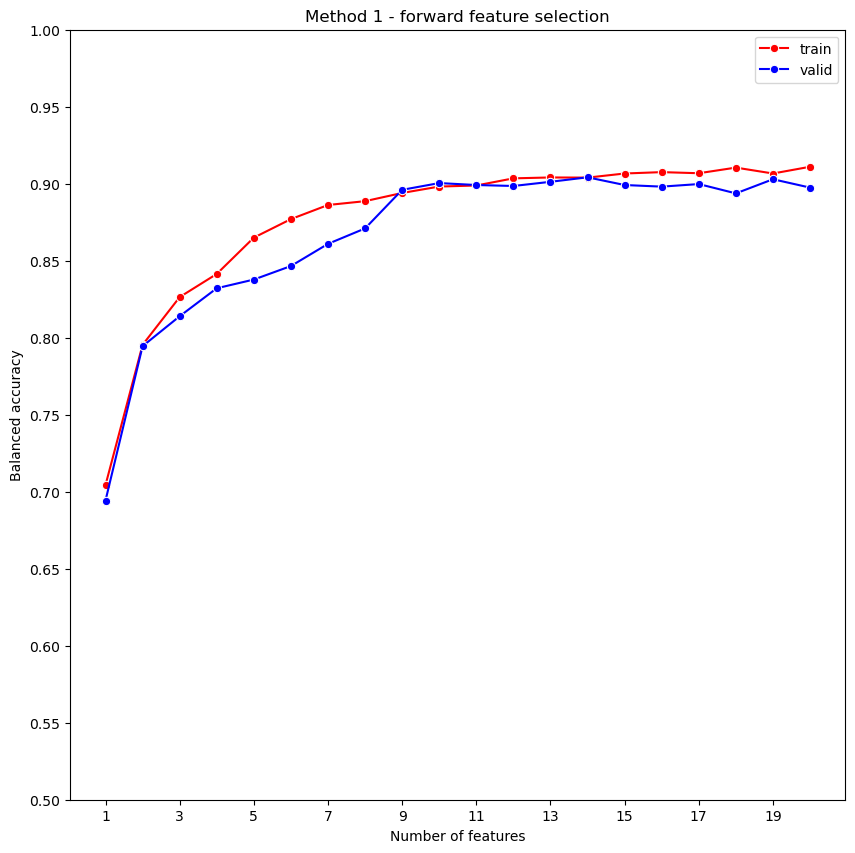

In [83]:
ffss = list(range(1, 21, 1))
iters = 3

b_accuracies_train = []
b_accuracies_valid = []

for j, ffs in enumerate(ffss):
    b_accuracies_train.append([])
    b_accuracies_valid.append([])
    for i in range(iters):
        with open(f"output/spam/method1/MACCHY_spam_features_{ffs}_{i}.txt") as f:
            columns = [line.rstrip() for line in f]
            X_train_t = X_train.loc[:, columns]
            X_valid_t = X_valid.loc[:, columns]

            xgb = XGBClassifier()
            xgb.fit(X_train_t, y_train)

            b_accuracies_train[j].append(balanced_accuracy_score(y_train, xgb.predict(X_train_t)))
            b_accuracies_valid[j].append(balanced_accuracy_score(y_valid, xgb.predict(X_valid_t)))

plt.figure(figsize=(10, 10))
sns.lineplot(x=ffss, y=np.mean(b_accuracies_train, axis=1), marker="o", label="train", color="r")
sns.lineplot(x=ffss, y=np.mean(b_accuracies_valid, axis=1), marker="o", label="valid", color="b")

plt.title("Method 1 - forward feature selection")
plt.ylabel("Balanced accuracy")
plt.xlabel("Number of features")

plt.xticks(np.arange(min(ffss), max(ffss)+1, 2))
plt.yticks(np.arange(0.5, 1.025, 0.05))

plt.show()

## Method 2

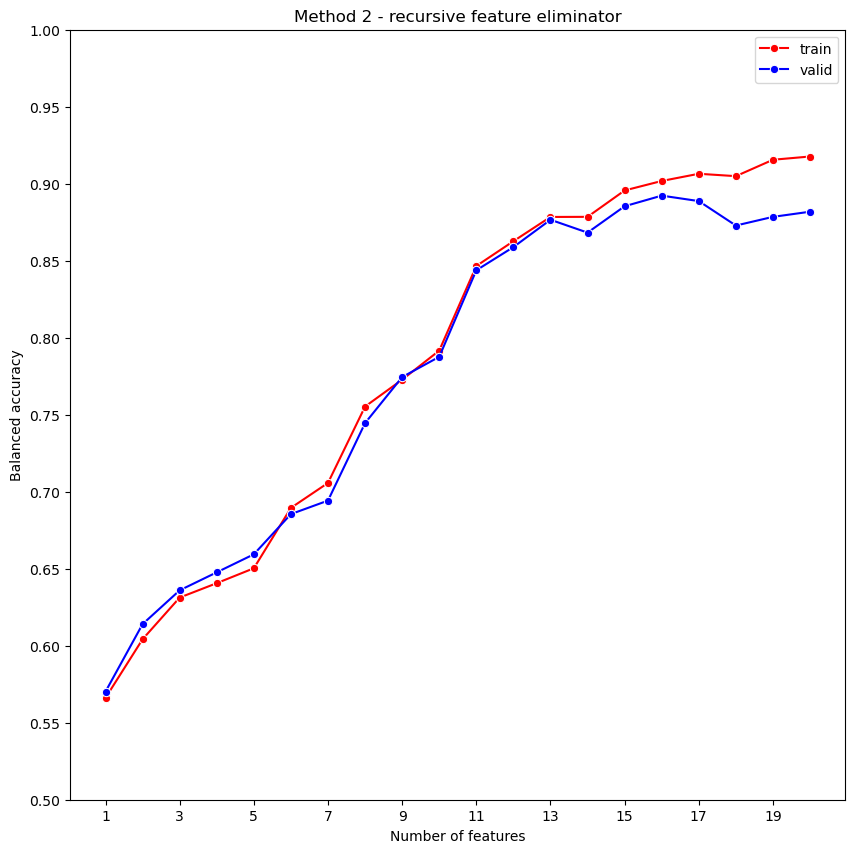

In [84]:
ffss = list(range(1, 21, 1))
iters = 3

b_accuracies_train = []
b_accuracies_valid = []

for j, ffs in enumerate(ffss):
    b_accuracies_train.append([])
    b_accuracies_valid.append([])
    for i in range(iters):
        with open(f"output/spam/method2/MACCHY_spam_features_{ffs}_{i}.txt") as f:
            columns = [line.rstrip() for line in f]
            X_train_t = X_train.loc[:, columns]
            X_valid_t = X_valid.loc[:, columns]

            xgb = XGBClassifier()
            xgb.fit(X_train_t, y_train)

            b_accuracies_train[j].append(balanced_accuracy_score(y_train, xgb.predict(X_train_t)))
            b_accuracies_valid[j].append(balanced_accuracy_score(y_valid, xgb.predict(X_valid_t)))

plt.figure(figsize=(10, 10))
sns.lineplot(x=ffss, y=np.mean(b_accuracies_train, axis=1), marker="o", label="train", color="r")
sns.lineplot(x=ffss, y=np.mean(b_accuracies_valid, axis=1), marker="o", label="valid", color="b")

plt.title("Method 2 - recursive feature eliminator")
plt.ylabel("Balanced accuracy")
plt.xlabel("Number of features")

plt.xticks(np.arange(min(ffss), max(ffss)+1, 2))
plt.yticks(np.arange(0.5, 1.025, 0.05))

plt.show()

## Method 3

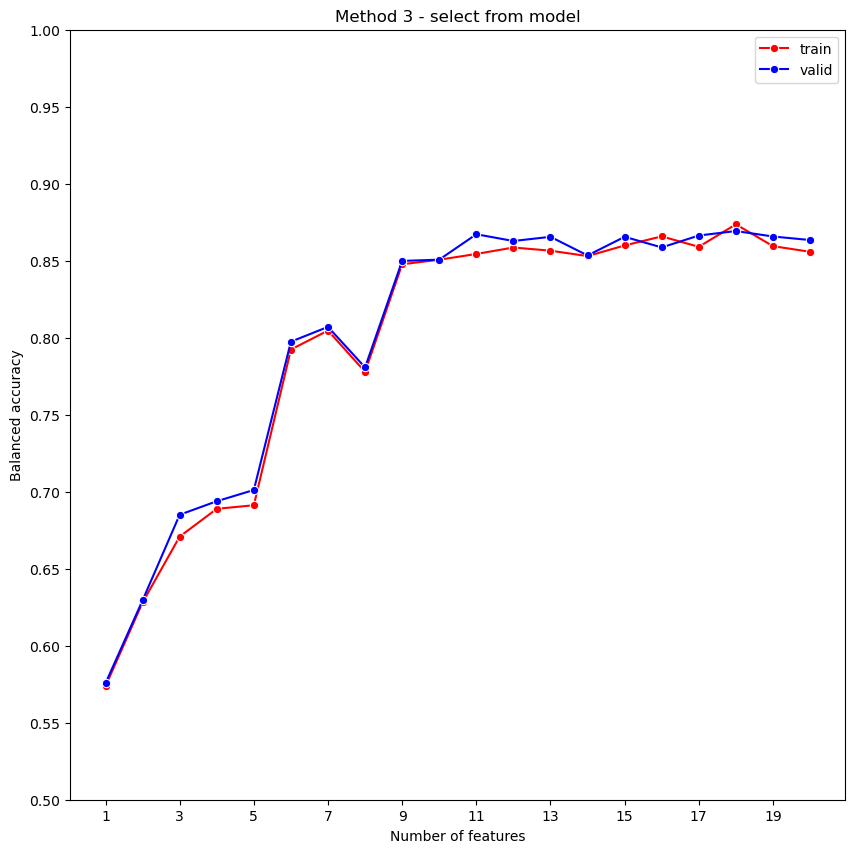

In [85]:
ffss = list(range(1, 21, 1))
iters = 3

b_accuracies_train = []
b_accuracies_valid = []

for j, ffs in enumerate(ffss):
    b_accuracies_train.append([])
    b_accuracies_valid.append([])
    for i in range(iters):
        with open(f"output/spam/method3/MACCHY_spam_features_{ffs}_{i}.txt") as f:
            columns = [line.rstrip() for line in f]
            X_train_t = X_train.loc[:, columns]
            X_valid_t = X_valid.loc[:, columns]

            xgb = XGBClassifier()
            xgb.fit(X_train_t, y_train)

            b_accuracies_train[j].append(balanced_accuracy_score(y_train, xgb.predict(X_train_t)))
            b_accuracies_valid[j].append(balanced_accuracy_score(y_valid, xgb.predict(X_valid_t)))

plt.figure(figsize=(10, 10))
sns.lineplot(x=ffss, y=np.mean(b_accuracies_train, axis=1), marker="o", label="train", color="r")
sns.lineplot(x=ffss, y=np.mean(b_accuracies_valid, axis=1), marker="o", label="valid", color="b")

plt.title("Method 3 - select from model")
plt.ylabel("Balanced accuracy")
plt.xlabel("Number of features")

plt.xticks(np.arange(min(ffss), max(ffss)+1, 2))
plt.yticks(np.arange(0.5, 1.025, 0.05))

plt.show()

## Method 4

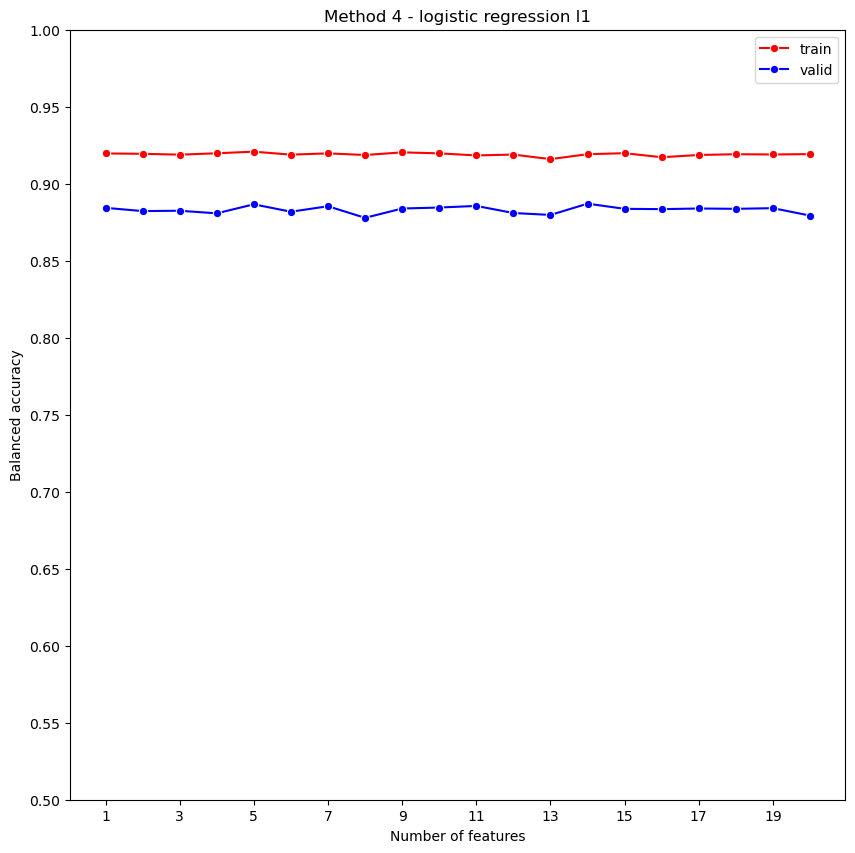

In [92]:
ffss = list(range(1, 21, 1))
iters = 3

b_accuracies_train = []
b_accuracies_valid = []

for j, ffs in enumerate(ffss):
    b_accuracies_train.append([])
    b_accuracies_valid.append([])
    for i in range(iters):
        with open(f"output/spam/method4/MACCHY_spam_features_{ffs}_{i}.txt") as f:
            columns = [line.rstrip() for line in f]
            X_train_t = X_train.loc[:, columns]
            X_valid_t = X_valid.loc[:, columns]

            xgb = XGBClassifier()
            xgb.fit(X_train_t, y_train)

            b_accuracies_train[j].append(balanced_accuracy_score(y_train, xgb.predict(X_train_t)))
            b_accuracies_valid[j].append(balanced_accuracy_score(y_valid, xgb.predict(X_valid_t)))

plt.figure(figsize=(10, 10))
sns.lineplot(x=ffss, y=np.mean(b_accuracies_train, axis=1), marker="o", label="train", color="r")
sns.lineplot(x=ffss, y=np.mean(b_accuracies_valid, axis=1), marker="o", label="valid", color="b")

plt.title("Method 4 - logistic regression l1")
plt.ylabel("Balanced accuracy")
plt.xlabel("Number of features")

plt.xticks(np.arange(min(ffss), max(ffss)+1, 2))
plt.yticks(np.arange(0.5, 1.025, 0.05))

plt.show()

# Select best model

In [93]:
ffss = list(range(1, 21, 1))
iters = 3

b_accuracies_train = []
b_accuracies_test = []
methods = [f"{el}{i+1}" for i, el in enumerate(["method"] * 4)]

for method in methods:
    for j, ffs in enumerate(ffss):
        b_accuracies_train.append([])
        b_accuracies_test.append([])
        for i in range(iters):
            with open(f"output/spam/{method}/MACCHY_spam_features_{ffs}_{i}.txt") as f:
                columns = [line.rstrip() for line in f]
                X_train_t = X_train.loc[:, columns]
                X_valid_t = X_valid.loc[:, columns]

                xgb = XGBClassifier()
                xgb.fit(X_train_t, y_train)
                if (b_acc := balanced_accuracy_score(y_valid, xgb.predict(X_valid_t))) >= 0.90:
                    print(f"METHOD: {method}, FEATURES: {ffs}, ITER: {i}, B_ACC: {b_acc}, COLUMNS: {X_train_t.columns.values}")

METHOD: method1, FEATURES: 10, ITER: 0, B_ACC: 0.9004205269728629, COLUMNS: ['call' 'claim' 'contact' 'free' 'reply' 'service' 'stop' 'tone' 'txt'
 'win']
METHOD: method1, FEATURES: 10, ITER: 1, B_ACC: 0.9004205269728629, COLUMNS: ['call' 'claim' 'contact' 'free' 'reply' 'service' 'stop' 'tone' 'txt'
 'win']
METHOD: method1, FEATURES: 10, ITER: 2, B_ACC: 0.9004205269728629, COLUMNS: ['call' 'claim' 'contact' 'free' 'reply' 'service' 'stop' 'tone' 'txt'
 'win']
METHOD: method1, FEATURES: 13, ITER: 1, B_ACC: 0.9054142847756095, COLUMNS: ['call' 'cash' 'claim' 'contact' 'free' 'guarantee' 'pmin' 'reply'
 'service' 'stop' 'tone' 'txt' 'win']
METHOD: method1, FEATURES: 14, ITER: 0, B_ACC: 0.9041658453249228, COLUMNS: ['award' 'call' 'cash' 'claim' 'contact' 'free' 'guarantee' 'reply'
 'service' 'stop' 'tone' 'txt' 'video' 'win']
METHOD: method1, FEATURES: 14, ITER: 1, B_ACC: 0.9041658453249228, COLUMNS: ['award' 'call' 'cash' 'claim' 'contact' 'free' 'guarantee' 'reply'
 'service' 'stop' 't

In [ ]:
#X_train_final = artificial_train_x.loc[:, [48, 64, 105, 153, 241, 442]]
#X_test_final = artificial_test_x.loc[:, [48, 64, 105, 153, 241, 442]]

#xgb.fit(X_train_final, artificial_train_y)

#pd.DataFrame(xgb.predict_proba(X_test_final)).to_csv("output/artificial/final/MACCHY_artificial_prediction.txt", index=None)
#np.savetxt("output/artificial/final/MACCHY_artificial_features.txt", X_test_final.columns